In [32]:
# Import Libraries
from textblob import TextBlob
import sys
import tweepy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import nltk
import pycountry
import re
import string
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from langdetect import detect
from nltk.stem import SnowballStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer
import nltk
nltk.download('vader_lexicon')
from IPython.display import display


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Robotics\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [33]:
# Authentication
consumerKey = "jLsJDtWU8yD5tZlcmwlzYnGjj"
consumerSecret = "Y236WRUhs5ylGfcZwjmabwPRWwedThHVB8gFVBPC3oTNAbRnCz"
accessToken = "964316780993933313-ZJOdE1MRMA8WyqZoNajtj0EWy4KQVDI"
accessTokenSecret = "qMOuqbyZmKXQTVXGFofwriLZpZn5zAAwGjsw0Wlft7M0a"
auth = tweepy.OAuthHandler(consumerKey, consumerSecret)
auth.set_access_token(accessToken, accessTokenSecret)
api = tweepy.API(auth)

In [34]:
#Sentiment Analysis
def percentage(part,whole):
 return 100 * float(part)/float(whole)
keyword = 'gay'
noOfTweet = 1000

tweets = tweepy.Cursor(api.search_tweets, q=keyword,geocode = '31.9686,-100,300mi').items(noOfTweet)
positive = 0
negative = 0
neutral = 0
polarity = 0
tweet_list = []
neutral_list = []
negative_list = []
positive_list = []
cityDict = {}
# write a function that takes the average of a given array and returns the average
def average(arr):
    return (sum(arr) / len(arr))
usefulTweets = 0
for tweet in tweets:
    location = tweet.user.location
    username = tweet.user.id
    users = []
    if "TX" in location:
        usefulTweets+=1
        location = (location.replace(', TX', '')).lower()
        if location in cityDict.keys():
            cityDict[location][0]+=1
        else:
            cityDict[location] = [1,[]]
        tweet_list.append(tweet.text)

        print(location)
        analysis = TextBlob(tweet.text)
        score = SentimentIntensityAnalyzer().polarity_scores(tweet.text)
        neg = score['neg']
        neu = score['neu']
        pos = score['pos']
        comp = score['compound']
        polarity += analysis.sentiment.polarity
        cityDict[location][1].append(polarity)
        if username in users:
            if neg > pos:
                negative_list.append(tweet.text)
                negative += 1
            elif pos > neg:
                positive_list.append(tweet.text)
                positive += 1
            
            elif pos == neg:
                neutral_list.append(tweet.text)
                neutral += 1
for city in cityDict:
    cityDict[city][1] = sum(cityDict[city][1])/len(cityDict[city][1])
positive = percentage(positive, noOfTweet)
negative = percentage(negative, noOfTweet)
neutral = percentage(neutral, noOfTweet)
polarity = percentage(polarity, noOfTweet)
positive = format(positive, '.1f')
negative = format(negative, '.1f')
neutral = format(neutral, '.1f')
print(cityDict)
print('---')
print(usefulTweets)

austin
san antonio
dallas
houston
dallas
houston
houston
austin
san antonio
dallas
dallas
dallas
houston
houston
plano
houston
san marcos
tx
san marcos
austin
san marcos
austin
austin
houston
dallas
houston
fort worth
houston
new braunfels
san marcos
somewhere
austin
dallas
austin
tomball
houston
arlington
austin
el paso 
houston
austin
austin
houston
austin
san antonio
houston
bee cave
houston
dallas
san antonio
dallas
houston
houston
dallas
houston
irving
college station
fredericksburg
houston
houston
houston
dallas
austin
austin
austin
austin
houston
tx
dallas
austin
dallas
frisco
austin
sherman
houston
austin
austin
austin
houston
austin
houston
san antonio
houston
7️⃣1️⃣3️⃣
tx, usa
houston
austin
dallas ,tx
san antonio
dallas
houston
somewhere
college station
austin
houston
houston
round rock
austin
dallas
houston
houston
houston
austin
dallas
tx
dallas
houston
houston
garland
corsicana
dallas
houston
dallas
san antonio
san antonio
san antonio
dallas
houston
houston
houston
housto

In [45]:
#Number of Tweets (Total, Positive, Negative, Neutral)
tweet_list = pd.DataFrame(tweet_list)
neutral_list = pd.DataFrame(neutral_list)
negative_list = pd.DataFrame(negative_list)
positive_list = pd.DataFrame(positive_list)
print('total number: ',len(tweet_list))
print('positive number: ',len(positive_list))
print('negative number: ', len(negative_list))
print('neutral number: ',len(neutral_list))

total number:  402
positive number:  0
negative number:  0
neutral number:  0


In [46]:
#Cleaning Text (RT, Punctuation etc)

#Creating new dataframe and new features
tw_list = pd.DataFrame(tweet_list)
tw_list["text"] = tw_list[0]

#Removing RT, Punctuation etc
remove_rt = lambda x: re.sub('RT @\w+: '," ",x)
rt = lambda x: re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ", x)
tw_list["text"] = tw_list.text.map(remove_rt).map(rt)
tw_list["text"] = tw_list.text.str.lower()
tw_list.head(10)

,0,text,polarity,subjectivity,sentiment,neg,neu,pos,compound
0,"Dear Reed Galen, gay teenage boys despise you....",dear reed galen gay teenage boys despise you,0.208333,0.291667,positive,NaN,NaN,NaN,NaN
1,"Fellas, is it gay to have a fully functioning ...",fellas is it gay to have a fully functioning ...,0.416667,0.583333,negative,NaN,NaN,NaN,NaN
2,"""I can't do math, I'm gay.""",i can t do math i m gay,0.416667,0.583333,neutral,0.0,1.0,0.0,0.0
3,idk you had to have done sum really gay shit f...,idk you had to have done sum really gay shit f...,0.108333,0.691667,negative,NaN,NaN,NaN,NaN
4,Petition to ban high schoolers from gay Twitter,petition to ban high schoolers from gay twitter,0.288333,0.561667,negative,NaN,NaN,NaN,NaN
5,"If y’all GAY, JUST SAY THAT. 😂😂😂😂",if y all gay just say that,0.416667,0.583333,neutral,0.0,1.0,0.0,0.0
6,They want God to be a man so bad. 😂🤣😂 Them nig...,they want god to be a man so bad them nig...,-0.141667,0.625000,negative,NaN,NaN,NaN,NaN
7,@Channakt @mel_fairchild1 I’ve had this happen...,fairchild1 i ve had this happen and also b...,-0.500000,0.866667,positive,NaN,NaN,NaN,NaN
8,@Shanitaaaa @TayeDiggs I did not realize the d...,i did not realize the dude was gay it def...,0.305556,0.527778,positive,NaN,NaN,NaN,NaN
9,I want a fem so bad... all the gay fine fem bi...,i want a fem so bad all the gay fine fem bi...,0.044444,0.583333,negative,NaN,NaN,NaN,NaN


In [37]:
#Calculating Negative, Positive, Neutral and Compound values
tw_list[['polarity', 'subjectivity']] = tw_list['text'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))
for index, row in tw_list['text'].iteritems():
    score = SentimentIntensityAnalyzer().polarity_scores(row)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    if neg > pos:
        tw_list.loc[index, 'sentiment'] = "negative"
    elif pos > neg:
        tw_list.loc[index, 'sentiment'] = "positive"
    else:
        tw_list.loc[index, 'sentiment'] = "neutral"
        tw_list.loc[index, 'neg'] = neg
        tw_list.loc[index, 'neu'] = neu
        tw_list.loc[index, 'pos'] = pos
        tw_list.loc[index, 'compound'] = comp
tw_list.head(10)
#Creating new data frames for all sentiments (positive, negative and neutral)
tw_list_negative = tw_list[tw_list["sentiment"]=="negative"]
tw_list_positive = tw_list[tw_list["sentiment"]=="positive"]
tw_list_neutral = tw_list[tw_list["sentiment"]=="neutral"]

In [38]:
def count_values_in_column(data,feature):
    total=data.loc[:,feature].value_counts(dropna=False)
    percentage=round(data.loc[:,feature].value_counts(dropna=False,normalize=True)*100,2)
    return pd.concat([total,percentage],axis=1,keys=['Total','Percentage'])
#Count_values for sentiment
count_values_in_column(tw_list,"sentiment")

,Total,Percentage
neutral,148,36.82
positive,132,32.84
negative,122,30.35


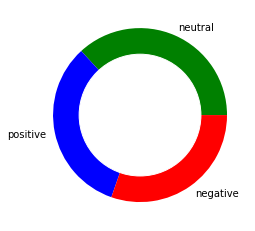

In [39]:
# create data for Pie Chart
pc = count_values_in_column(tw_list,'sentiment')
names= pc.index
size=pc['Percentage']
 
# Create a circle for the center of the plot
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(size, labels=names, colors=['green','blue','red'])
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

In [40]:
def create_wordcloud(text):
    mask = np.array(Image.open('cloud.png'))
    stopwords = set(STOPWORDS)
    wc = WordCloud(background_color='white',
    mask = mask,
    max_words=3000,
    stopwords=stopwords,
    repeat=True)
    wc.generate(str(text))
    wc.to_file("wc.png")
    print("Word Cloud Saved Successfully")
    path="wc.png"
    display(Image.open(path))

Word Cloud Saved Successfully


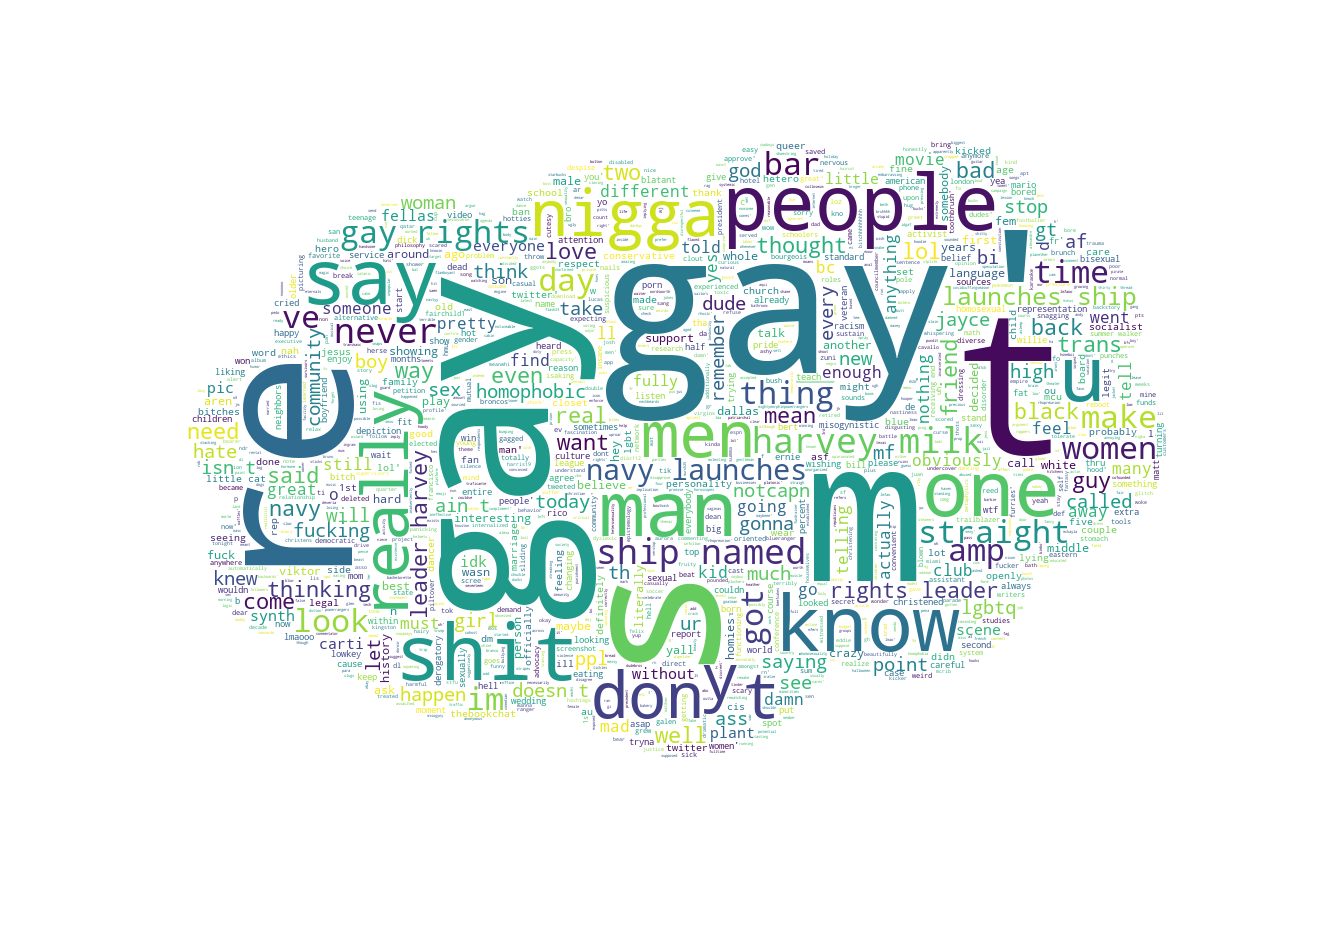

In [41]:
create_wordcloud(tw_list['text'].values)

Word Cloud Saved Successfully


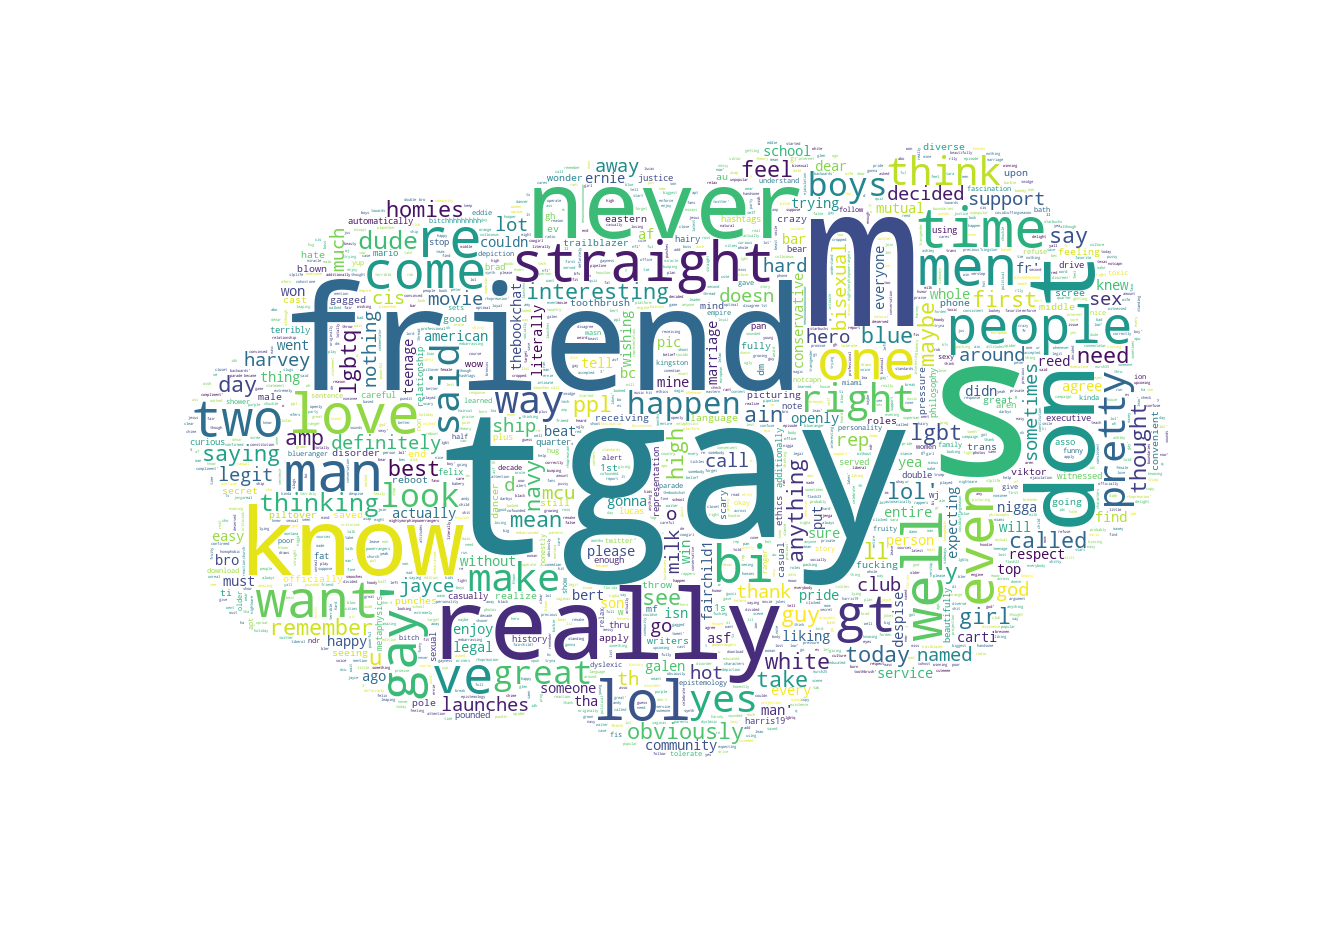

In [42]:

#Creating wordcloud for positive sentiment
create_wordcloud(tw_list_positive["text"].values)

Word Cloud Saved Successfully


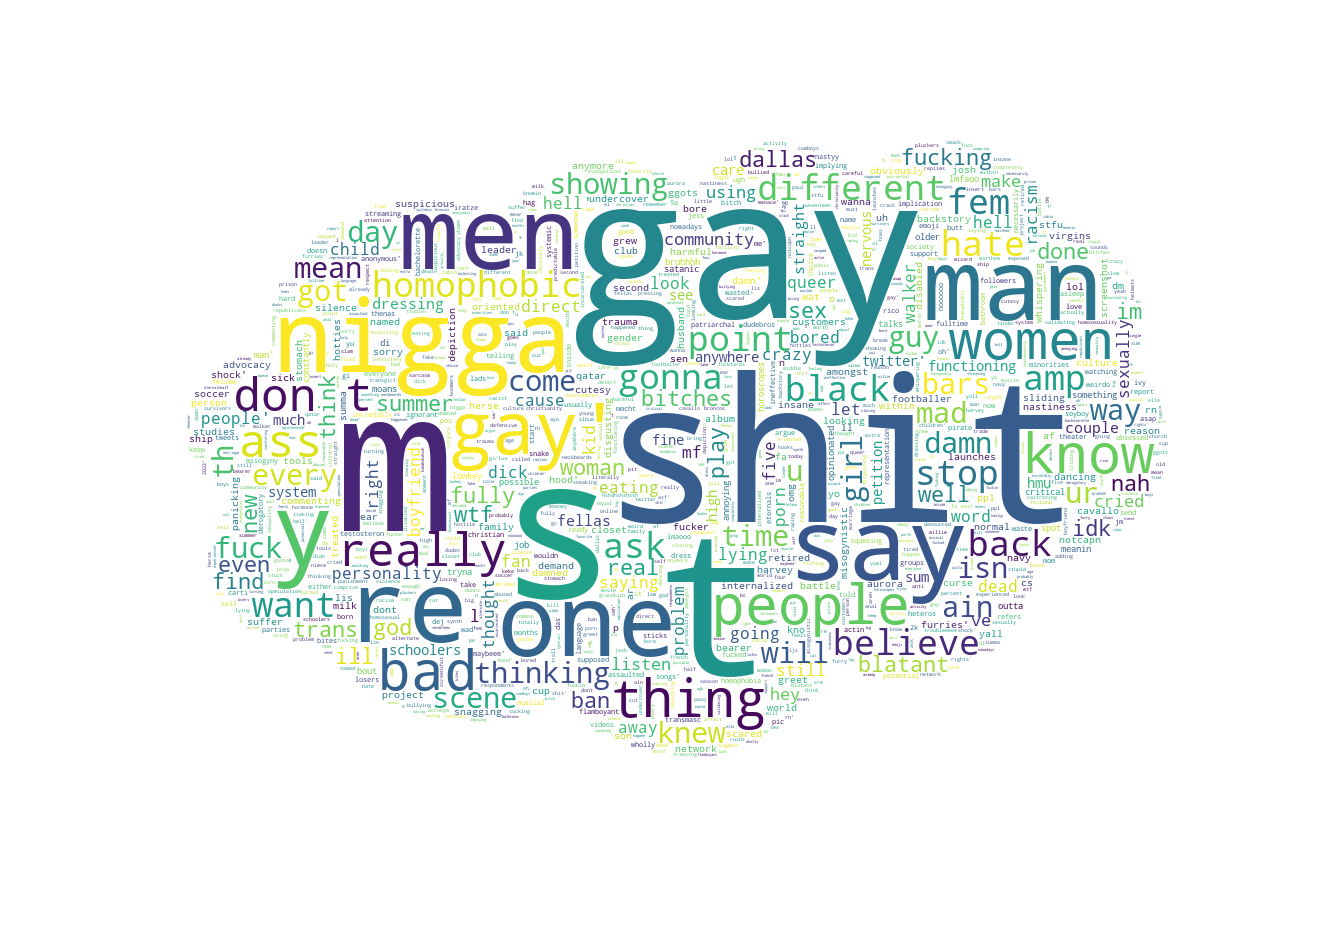

In [43]:

#Creating wordcloud for negative sentiment
create_wordcloud(tw_list_negative["text"].values)

Word Cloud Saved Successfully


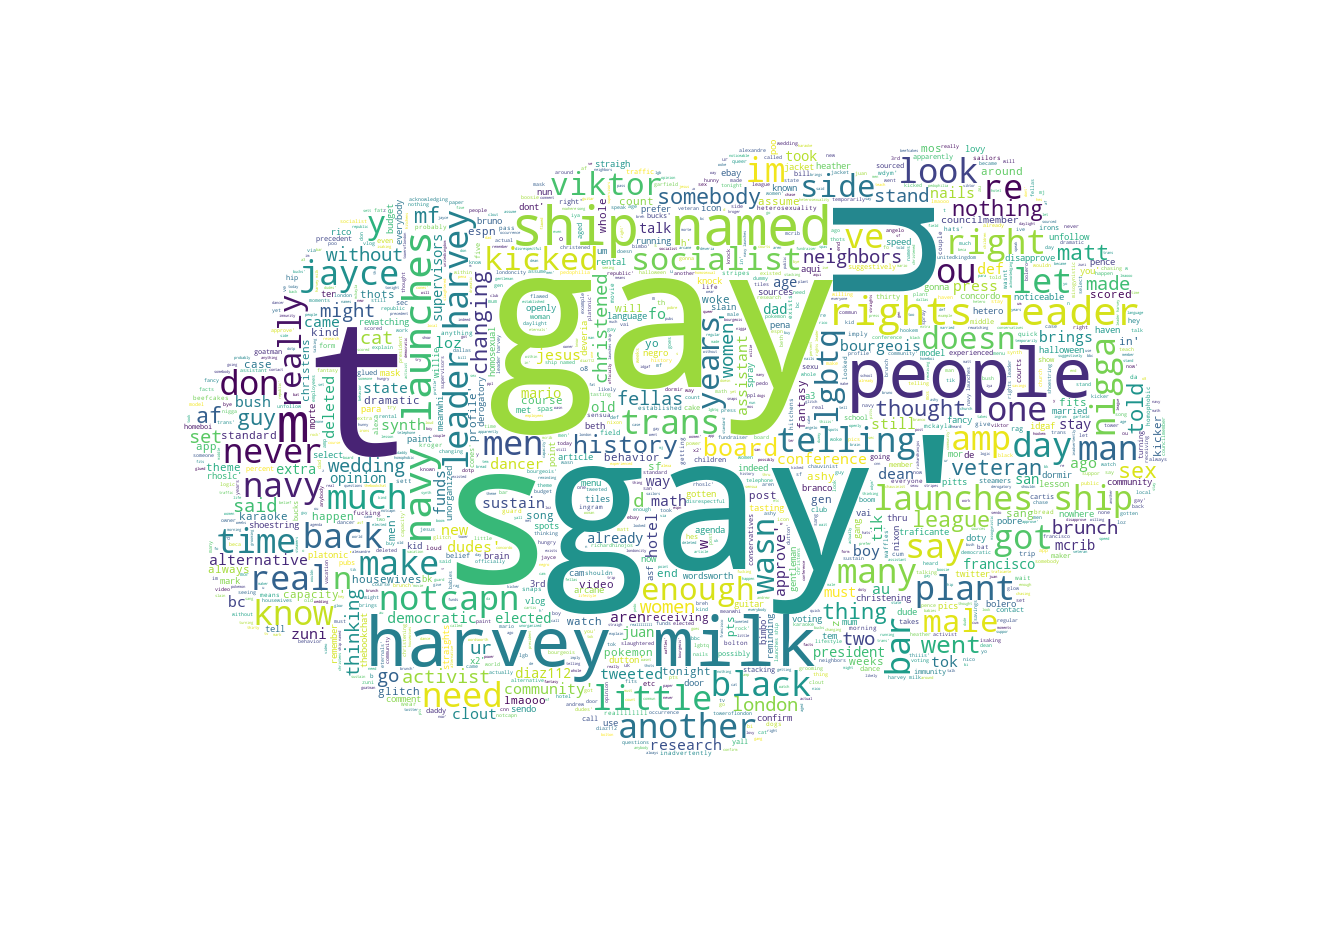

In [44]:
#Creating wordcloud for neutral sentiment
create_wordcloud(tw_list_neutral["text"].values)